<a href="https://colab.research.google.com/github/abhijith789/Gold-price-prediciton/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [5]:
#Loading the csv data into a Pandas Datafrme
gold_data = pd.read_csv('/content/gld_price_data.csv')


In [6]:
#Print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#Print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#Number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
#Getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#Checking the missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [11]:
#Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :
1- Postive correaltion
2- Negative correlation

In [16]:
import pandas as pd

# Assuming 'Date' is the column with the date string
gold_data['Date'] = pd.to_datetime(gold_data['Date'])  # Convert 'Date' column to datetime objects

# Now calculate the correlation, ignoring non-numeric columns like 'Date'
correlation = gold_data.corr(numeric_only=True)
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD      Year     Month  \
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017  0.944403 -0.023432   
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375  0.206654  0.020494   
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317 -0.775765 -0.047335   
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631 -0.172485 -0.011976   
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000 -0.791655 -0.012100   
Year     0.944403  0.206654 -0.775765 -0.172485 -0.791655  1.000000 -0.070903   
Month   -0.023432  0.020494 -0.047335 -0.011976 -0.012100 -0.070903  1.000000   
Day     -0.001525 -0.000198 -0.007988 -0.000206  0.002122 -0.006307  0.005550   

              Day  
SPX     -0.001525  
GLD     -0.000198  
USO     -0.007988  
SLV     -0.000206  
EUR/USD  0.002122  
Year    -0.006307  
Month    0.005550  
Day      1.000000  


In [14]:
correlation = gold_data.corr()

<Axes: >

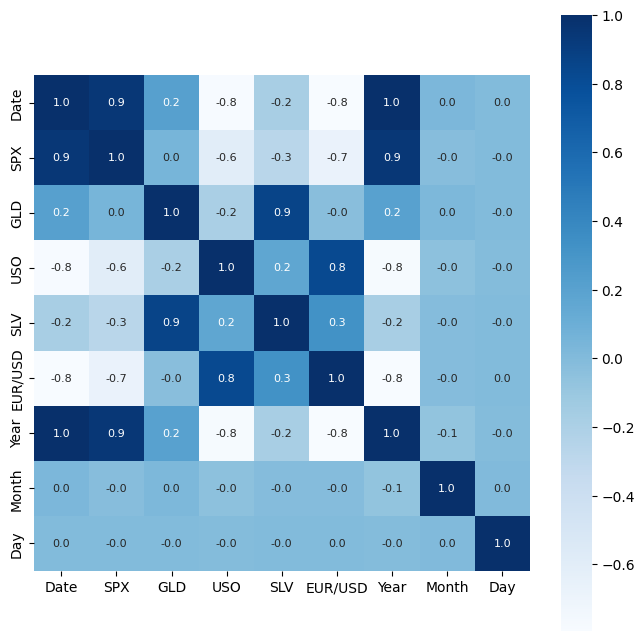

In [15]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: >

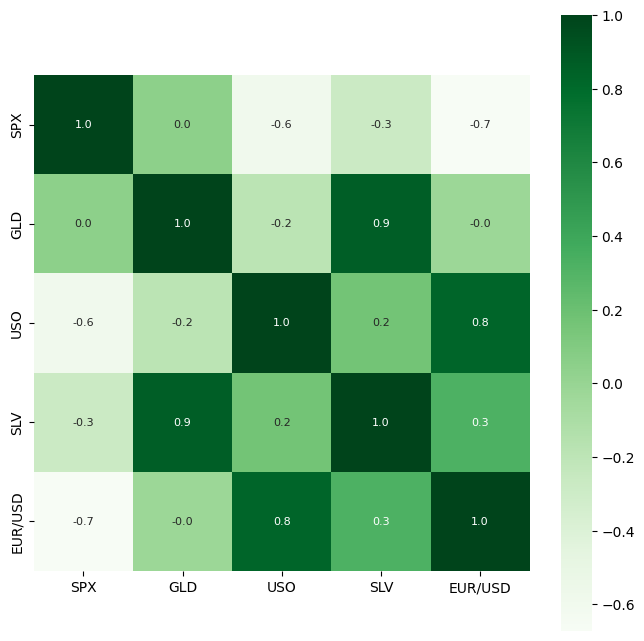

In [19]:
# prompt: I need to remove the Year, Month and day from the plot

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'Date' is the column with the date string
gold_data['Date'] = pd.to_datetime(gold_data['Date'])  # Convert 'Date' column to datetime objects

# Extract Year, Month, and Day
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

# Now calculate the correlation, dropping the date components
correlation = gold_data.drop(['Date', 'Year', 'Month', 'Day'], axis=1).corr()

# Constructing a heatmap to understand the correlation
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Greens')


In [20]:
#Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-21-c743d23d73e0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

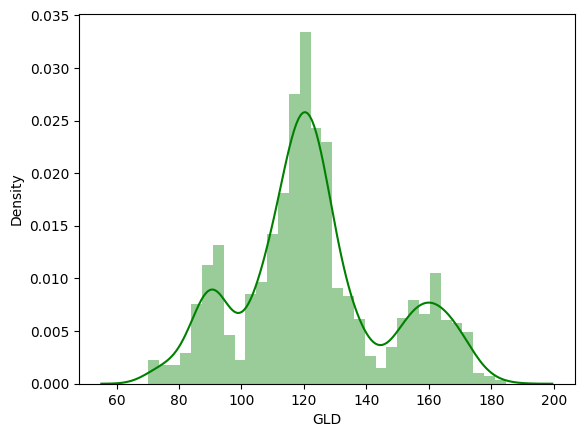

In [21]:
# Checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

In [24]:
X = gold_data.drop(['Date','GLD','Year','Month','Day'],axis=1)
Y = gold_data['GLD']

In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Testing Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model training : Random Forest Regressor

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation

In [30]:
test_data_prediction =regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[168.37019913  82.01249979 115.86600005 127.67160092 120.78510132
 154.62979731 150.27789764 126.27050084 117.48329894 126.0043007
 116.50080116 171.7273007  141.49559831 167.95369839 115.24220019
 117.64930058 137.45690323 170.06200081 159.0107025  159.3385003
 155.14530021 125.83630007 176.36159998 157.05930345 125.16990041
  93.68289959  77.11700006 120.48900018 119.08309947 167.42989965
  87.93590036 125.35880007  91.09890096 117.74519998 121.16279917
 137.19690099 115.43660125 115.15810085 146.78779953 107.30570106
 104.52160268  87.1096978  126.49100063 118.13219989 153.46209948
 119.59130038 108.52499992 108.4105983   93.24600058 127.42649699
  74.9828006  113.63889938 121.45289991 111.25739926 118.81839908
 120.75339945 159.56420007 167.8584007  147.04609722  85.85439862
  94.21250037  86.84319891  90.55560023 119.04780059 126.46640104
 127.63499984 169.49059976 122.34419938 117.13289899  98.32570022
 168.06680117 142.89549856 131.27690186 121.2138022  121.16359913
 119.6870006

In [32]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894318392020929


Compare the actual value and predicted values in a plot

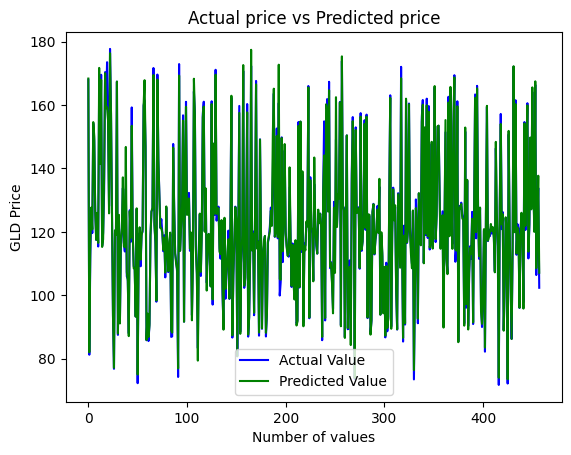

In [37]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()